In [ ]:
import pandas as pd

In [ ]:
def load_csv(filepath):

    for quoting in [0, 1, 2]:
        try:
            df = pd.read_csv(filepath, sep=',', engine='python', quoting=quoting, on_bad_lines='skip')
            return df
        except ValueError:
            pass

## if none of the quoting options work, try different encodings

    for encoding in ['utf-8', 'latin-1', 'utf-16']:
        try:
            df = pd.read_csv(filepath, sep=',', engine='python', encoding=encoding, on_bad_lines='skip')
            return df
        except UnicodeDecodeError:
            pass

    raise ValueError(f"Could not load file {filepath}.")

In [ ]:
## loading raw data

bp_stock = load_csv("BP Stock Price History.csv")
ftse100 = load_csv("FTSE 100 Historical Data.csv")
vix = load_csv("CBOE Volatility Index Historical Data.csv")
oil_futures = load_csv("Brent Oil Futures Historical Data.csv")
gdp = load_csv("GDP UK monthly data_cleaner.csv")
inflation = load_csv("Inflation Energy UK.csv")
gilt_yield = load_csv("United Kingdom 10-Year Bond Yield Historical Data.csv")
interest_rate = load_csv("Interest Rate UK.csv")

# **1. CLEANING DATASETS INDIVIDUALLY**

# **BP STOCK DATA**

In [ ]:
## cleaning BP stock data

bp_stock = pd.read_csv("BP Stock Price History.csv", parse_dates=["Date"])

bp_stock_cleaned = bp_stock[["Date", "Price", "Vol."]].copy() ## keeping relevant columns

bp_stock_cleaned["Date"] = pd.to_datetime(bp_stock_cleaned["Date"], format="%m/%d/%Y", errors="coerce")  ## converting to datetime

bp_stock_cleaned.loc[:, "Vol."] = bp_stock_cleaned["Vol."].str.replace("M", "").astype(float) * 1_000_000  ## formatting volume

nan_bp_volume_dates = bp_stock_cleaned[bp_stock_cleaned["Vol."].isna()]["Date"] ## checking NaN values
print(nan_bp_volume_dates)

bp_stock_cleaned["Vol."].fillna(25543353, inplace=True) ## filling missing value -- source: FT

bp_stock_cleaned.rename(columns={"Price": "BP_Price","Vol.": "BP_Volume"}, inplace=True) ## renaming columns

print(bp_stock_cleaned.head()) ## displaying first few rows

101   2024-09-16
Name: Date, dtype: datetime64[ns]
        Date  BP_Price   BP_Volume
0 2025-02-07    433.25  79060000.0
1 2025-02-06    429.00  36040000.0
2 2025-02-05    423.95  50280000.0
3 2025-02-04    422.20  46760000.0
4 2025-02-03    420.00  47210000.0


<ipython-input-360-d89e9d5aae3b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bp_stock_cleaned["Vol."].fillna(25543353, inplace=True) ## filling missing value -- source: FT
<ipython-input-360-d89e9d5aae3b>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bp_stock_cleaned["Vol."].fillna(25543353, inplace=T

In [ ]:
bp_stock_cleaned.to_csv("BP_Stock_Cleaned_vFinal.csv", index=False)

# **FTSE 100 DATA**

In [ ]:
## cleaning FTSE 100 data

ftse100_cleaned = ftse100[["Date", "Close/Last"]].copy() ## keeping relevant columns

ftse100_cleaned["Date"] = pd.to_datetime(ftse100_cleaned["Date"], format="%m/%d/%Y", errors="coerce") ## converting to datetime

ftse100_cleaned.rename(columns={"Close/Last": "FTSE100_Close"}, inplace=True) ## renaming columns

print(ftse100_cleaned.head()) ## displaying first few rows


        Date  FTSE100_Close
0 2025-01-30        8646.88
1 2025-01-29        8557.81
2 2025-01-28        8533.87
3 2025-01-27        8503.71
4 2025-01-24        8502.35


In [ ]:
ftse100_cleaned.to_csv("FTSE100_Cleaned_vFinal.csv", index=False)

# **VIX INDEX DATA**

In [ ]:
with open("CBOE Volatility Index Historical Data.csv", "r", encoding="utf-8") as file: ## reading the file as raw text to remove unwanted quotes
    lines = file.readlines()

cleaned_lines = [line.replace('"', '') for line in  lines] ## removing extra quotes from each line

with open("CBOE_VIX_Cleaned.csv", "w", encoding="utf-8") as file: ## writing back the cleaned version
    file.writelines(cleaned_lines)

vix = pd.read_csv("CBOE_VIX_Cleaned.csv", sep=",", skiprows=1, engine="python")

In [ ]:
vix.columns = ["Date", "Price", "Open", "High", "Low","Volume", "Change %"]

vix["Date"] = pd.to_datetime(vix["Date"], format="%m/%d/%Y", errors="coerce")

vix_cleaned = vix[["Date", "Price"]].copy()

vix_cleaned.rename(columns={"Price": "VIX_Close"}, inplace=True)

vix_cleaned["VIX_Close"] = pd.to_numeric(vix_cleaned["VIX_Close"], errors="coerce") ## converting "VIX_Close" to numeric

print(vix_cleaned.head())

        Date  VIX_Close
0 2025-02-06      15.50
1 2025-02-05      15.77
2 2025-02-04      17.21
3 2025-02-03      18.62
4 2025-01-31      16.43


In [ ]:
vix_cleaned.to_csv("VIX_Cleaned_vFinal.csv", index=False)

# **BRENT OIL FUTURES DATA**

In [ ]:
with open("Brent Oil Futures Historical Data.csv", "r", encoding="utf-8") as file: ## reading the file as raw text
    lines = file.readlines()

cleaned_lines = [line.replace('"', '') for line in lines] ## removing extra ""

with open("Brent Oil Futures Historical Data_Cleaned.csv", "w", encoding="utf-8") as file:
    file.writelines(cleaned_lines)

oil_futures = pd.read_csv("Brent Oil Futures Historical Data_Cleaned.csv", sep=",", skiprows=1, engine="python")

In [ ]:
oil_futures.columns = ["Date", "Price", "Open", "High", "Low", "Volume", "Change %"] ## renaming columns properly

oil_futures["Date"] = pd.to_datetime(oil_futures["Date"], format="%m/%d/%Y", errors="coerce")

oil_futures_cleaned = oil_futures[["Date", "Price", "Volume"]].copy()

oil_futures_cleaned.loc[:, "Volume"] = oil_futures_cleaned["Volume"].str.replace("K", "").astype(float) * 1_000  ## formatting volume

oil_futures_cleaned.rename(columns={"Price": "Oil_Futures_Close", "Volume": "Oil_Futures_Volume"}, inplace=True)

# Convert "oil_futures_Close" to numeric
oil_futures_cleaned["Oil_Futures_Close"] = pd.to_numeric(oil_futures_cleaned["Oil_Futures_Close"], errors="coerce")

# Display first few rows to confirm
print(oil_futures_cleaned.head())

        Date  Oil_Futures_Close Oil_Futures_Volume
0 2025-01-30              75.89           366030.0
1 2025-01-29              75.61           341450.0
2 2025-01-28              76.49           463170.0
3 2025-01-27              76.18           446190.0
4 2025-01-24              77.55           380750.0


In [ ]:
oil_futures_cleaned.to_csv("Oil_Futures_Cleaned_vFinal.csv", index=False)

# **GDP DATA**

In [ ]:
gdp.rename(columns={"Monthly GDP": "GDP_Value"}, inplace=True)

gdp["Date"] = pd.to_datetime(gdp["Date"], format="%b %Y", errors="coerce")

gdp["GDP_Value"] = pd.to_numeric(gdp["GDP_Value"], errors="coerce")

print(gdp.head())

        Date  GDP_Value
0 2007-01-01       82.9
1 2007-02-01       83.2
2 2007-03-01       83.3
3 2007-04-01       83.5
4 2007-05-01       83.9


In [ ]:
gdp.to_csv("GDP_Cleaned_vFinal.csv", index=False)

# **INFLATION DATA**

In [ ]:
inflation.rename(columns={"observation_date": "Date", "GBRCPIENGMINMEI": "Inflation_Index"}, inplace=True)

inflation["Date"] = pd.to_datetime(inflation["Date"], format="%Y-%m-%d", errors="coerce")

inflation["Inflation_Index"] = pd.to_numeric(inflation["Inflation_Index"], errors="coerce")

print(inflation.head())

        Date  Inflation_Index
0 2014-11-01            106.3
1 2014-12-01            104.0
2 2015-01-01            100.5
3 2015-02-01             99.9
4 2015-03-01            100.7


In [ ]:
inflation.to_csv("Inflation_Cleaned_vFinal.csv", index=False)

# **GILT YIELD DATA**

In [ ]:
gilt_yield_cleaned = gilt_yield[["Date", "Price"]].copy()

gilt_yield_cleaned.rename(columns={"Price": "Gilt_Yield"}, inplace=True)

gilt_yield_cleaned["Date"] = pd.to_datetime(gilt_yield_cleaned["Date"], format="%m/%d/%Y", errors="coerce")

gilt_yield_cleaned["Gilt_Yield"] = pd.to_numeric(gilt_yield_cleaned["Gilt_Yield"], errors="coerce")

print(gilt_yield_cleaned.head())

        Date  Gilt_Yield
0 2025-02-07      4.4760
1 2025-02-06      4.4820
2 2025-02-05      4.4350
3 2025-02-04      4.5210
4 2025-02-03      4.4895


In [ ]:
gilt_yield_cleaned.to_csv("Gilt_Yield_Cleaned_vFinal.csv", index=False)

# **INTEREST RATE**

In [ ]:
interest_rate[['Date', 'Interest_Rate']] = interest_rate.iloc[:, 0].str.split(',', expand=True) ## splitting the single column into two columns

interest_rate["Interest_Rate"] = interest_rate["Interest_Rate"].str.replace('"', '', regex=False) ## remove extra ""

interest_rate["Date"] = pd.to_datetime(interest_rate["Date"], format="%d %b %y", errors="coerce")

interest_rate["Interest_Rate"] = pd.to_numeric(interest_rate["Interest_Rate"], errors="coerce")

interest_rate_cleaned = interest_rate[["Date", "Interest_Rate"]].copy()

print(interest_rate_cleaned.head())

        Date  Interest_Rate
0 2024-11-07           4.75
1 2024-08-01           5.00
2 2023-08-03           5.25
3 2023-06-22           5.00
4 2023-05-11           4.50


In [ ]:
interest_rate_cleaned.to_csv("Interest_Rate_Cleaned_vFinal.csv", index=False)

# **2. MERGING DATASETS**

In [ ]:
## defining dataset names and corresponding filenames
datasets_info = {
    "BP_Stock": "BP_Stock_Cleaned_vFinal.csv",
    "Brent_Oil": "Oil_Futures_Cleaned_vFinal.csv",
    "FTSE100": "FTSE100_Cleaned_vFinal.csv",
    "GDP": "GDP_Cleaned_vFinal.csv",
    "Gilt_Yield": "Gilt_Yield_Cleaned_vFinal.csv",
    "Inflation": "Inflation_Cleaned_vFinal.csv",
    "Interest_Rate": "Interest_Rate_Cleaned_vFinal.csv",
    "VIX": "VIX_Cleaned_vFinal.csv"
}

In [ ]:
## datasets into dictionary
datasets = {name: pd.read_csv(file, parse_dates=["Date"]) for name, file in datasets_info.items()}

In [ ]:
start_date = max(df["Date"].min() for df in datasets.values())  ## latest start date
end_date = min(df["Date"].max() for df in datasets.values())    ## earliest end date

In [ ]:
## filtering each dataset to match the common date range
for name in datasets:
    datasets[name] = datasets[name][(datasets[name]["Date"] >= start_date) & (datasets[name]["Date"] <= end_date)]

In [ ]:
## merging all datasets on BP_Stock using "Date" as the key
merged_df = datasets["BP_Stock"]
for name, df in datasets.items():
    if name != "BP_Stock":
        merged_df = merged_df.merge(df, on="Date", how="left")

In [ ]:
# Save final merged dataset
merged_df.to_csv("Merged_Dataset_v1.csv", index=False)

In [ ]:
merged_df.head()

,Date,BP_Price,BP_Volume,Oil_Futures_Close,Oil_Futures_Volume,FTSE100_Close,GDP_Value,Gilt_Yield,Inflation_Index,Interest_Rate,VIX_Close
0,2024-11-01,378.20,74740000.0,73.10,336960.0,8177.15,101.1,4.4425,149.9,NaN,21.88
1,2024-10-31,376.65,44850000.0,73.16,14270.0,8110.10,NaN,4.4450,NaN,NaN,23.16
2,2024-10-30,374.05,106190000.0,72.55,90920.0,8159.63,NaN,4.3490,NaN,NaN,20.35
3,2024-10-29,379.25,65070000.0,71.12,108890.0,8219.61,NaN,4.3140,NaN,NaN,19.34
4,2024-10-28,399.10,35300000.0,71.42,317180.0,8285.62,NaN,4.2570,NaN,NaN,19.80


# **3. IMPUTATIONS**

# INTEREST RATE

In [ ]:
df = merged_df

In [ ]:
## counting the frequency of available records
print("\n🔹 Frequency of GDP updates:", df["GDP_Value"].notna().sum())
print("🔹 Frequency of Inflation updates:", df["Inflation_Index"].notna().sum())
print("🔹 Frequency of Interest Rate updates:", df["Interest_Rate"].notna().sum())


🔹 Frequency of GDP updates: 77
🔹 Frequency of Inflation updates: 77
🔹 Frequency of Interest Rate updates: 20


In [ ]:
## sorting the dataset by date in ascending order (oldest first)
df = df.sort_values(by="Date", ascending=True)

## forward filling the Interest Rate column correctly
df["Interest_Rate"] = df["Interest_Rate"].ffill()

## sorting it back to descending order
df = df.sort_values(by="Date", ascending=False)

In [ ]:
## counting missing values in the Interest_Rate column
missing_interest_rates = df["Interest_Rate"].isna().sum()
print(f" Missing values in Interest_Rate: {missing_interest_rates}")

 Missing values in Interest_Rate: 381


In [ ]:
## filtering rows where Interest_Rate is NaN
nan_interest_dates = df[df["Interest_Rate"].isna()][["Date", "Interest_Rate"]]

print(f"First missing Interest_Rate date: {nan_interest_dates['Date'].max()}")
print(f"Last missing Interest_Rate date: {nan_interest_dates['Date'].min()}")

First missing Interest_Rate date: 2016-08-03 00:00:00
Last missing Interest_Rate date: 2015-02-02 00:00:00


In [ ]:
## imputing NaN values in Interest_Rate with 0.5 -- source: Central Bank
df["Interest_Rate"].fillna(0.5, inplace=True)

<ipython-input-390-3b0f8f4d6392>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Interest_Rate"].fillna(0.5, inplace=True)


# **Pre-checks for MIDAS**

**a) Outliers**

In [ ]:
import numpy as np

## defining numerical columns
num_cols = ["BP_Price", "BP_Volume", "Oil_Futures_Close", "Oil_Futures_Volume",
            "FTSE100_Close", "Gilt_Yield", "VIX_Close", "GDP_Value", "Inflation_Index", "Interest_Rate"]

## computing Z-scores for outlier detection
z_scores = np.abs((df[num_cols] - df[num_cols].mean()) / df[num_cols].std())

## indetifying outliers (Z-score > 3)
outliers = (z_scores > 3).sum()
print("\n Outlier Count Per Column:")
print(outliers)



 Outlier Count Per Column:
BP_Price               0
BP_Volume             47
Oil_Futures_Close      6
Oil_Futures_Volume    11
FTSE100_Close          7
Gilt_Yield             0
VIX_Close             32
GDP_Value              2
Inflation_Index        0
Interest_Rate          0
dtype: int64


**b) Correlation**

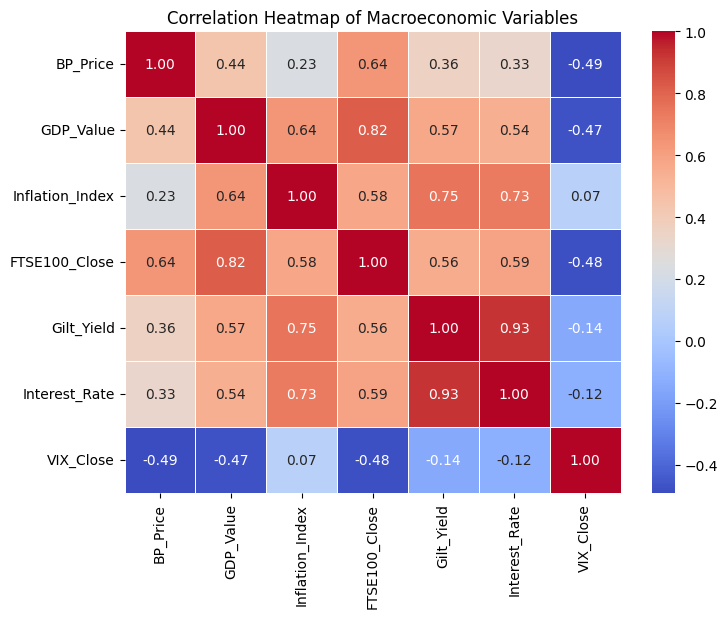

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## selecting relevant columns
correlation_data = df[["BP_Price", "GDP_Value", "Inflation_Index", "FTSE100_Close", "Gilt_Yield", "Interest_Rate", "VIX_Close"]]

## computing the correlation matrix
corr_matrix = correlation_data.corr()

##plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Macroeconomic Variables")
plt.show()

In [ ]:
df = df.drop(columns=["VIX_Close"])

# **GDP imputation**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

In [ ]:
high_freq_cols = ["FTSE100_Close", "Gilt_Yield", "Interest_Rate"]

In [ ]:
## creating MIDAS lags (U-MIDAS approach)
def create_midas_lags(df, target_col, high_freq_cols, lags=[0, 2, 5, 11]):
    df_midas = df.copy()
    for lag in lags:
        for col in high_freq_cols:
            df_midas[f"{col}_lag{lag}"] = df_midas[col].shift(lag)
    return df_midas

## applying MIDAS lag creation
df_midas = create_midas_lags(df, "GDP_Value", high_freq_cols)

In [ ]:
## filtering dataset: keep only rows where at least some high-frequency data is available
df_midas = df_midas[df["GDP_Value"].isna() | df_midas.drop(columns=["GDP_Value", "Inflation_Index"]).notna().all(axis=1)]

In [ ]:
## splitting into train/test sets
train = df_midas[df_midas["GDP_Value"].notna()].copy()
test = df_midas[df_midas["GDP_Value"].isna()].copy()

In [ ]:
## preparing data for regression
X_train = train.drop(columns=["GDP_Value", "Inflation_Index", "Date"])
y_train = train["GDP_Value"]
X_test = test.drop(columns=["GDP_Value", "Inflation_Index", "Date"])

In [ ]:
## handling missing values in features
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [ ]:
## normalizing features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
## training MIDAS regression model
midas_model = Ridge(alpha=1.0)  # Using Ridge regression to prevent overfitting
midas_model.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
## predicting missing GDP values
predictions = midas_model.predict(X_test_scaled)

In [ ]:
df.loc[df["GDP_Value"].isna(), "GDP_Value"] = predictions[:df["GDP_Value"].isna().sum()]

In [ ]:
df

,Date,BP_Price,BP_Volume,Oil_Futures_Close,Oil_Futures_Volume,FTSE100_Close,GDP_Value,Gilt_Yield,Inflation_Index,Interest_Rate
0,2024-11-01,378.20,74740000.0,73.10,336960.0,8177.15,101.100000,4.4425,149.9,5.0
1,2024-10-31,376.65,44850000.0,73.16,14270.0,8110.10,98.988403,4.4450,NaN,5.0
2,2024-10-30,374.05,106190000.0,72.55,90920.0,8159.63,99.981049,4.3490,NaN,5.0
3,2024-10-29,379.25,65070000.0,71.12,108890.0,8219.61,100.249940,4.3140,NaN,5.0
4,2024-10-28,399.10,35300000.0,71.42,317180.0,8285.62,100.942954,4.2570,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...
2460,2015-02-06,450.60,33550000.0,57.80,253310.0,6853.44,93.503418,1.6470,NaN,0.5
2461,2015-02-05,450.10,34600000.0,56.57,338820.0,6865.93,93.511560,1.5490,NaN,0.5
2462,2015-02-04,445.35,41630000.0,54.16,359740.0,6860.02,93.301238,1.5330,NaN,0.5
2463,2015-02-03,449.85,72460000.0,57.91,414590.0,6871.80,93.473555,1.4630,NaN,0.5


# **Inflation Imputation**

In [ ]:
## applying MIDAS lag creation for Inflation Index
df_midas = create_midas_lags(df, "Inflation_Index", high_freq_cols)

## keeping rows where Inflation_Index is missing but predictors are available
df_midas = df_midas[df["Inflation_Index"].isna() | df_midas.drop(columns=["GDP_Value", "Inflation_Index"]).notna().all(axis=1)]

## Train/test split
train = df_midas[df_midas["Inflation_Index"].notna()].copy()
test = df_midas[df_midas["Inflation_Index"].isna()].copy()

## preparing data
X_train, y_train = train.drop(columns=["GDP_Value", "Inflation_Index", "Date"]), train["Inflation_Index"]
X_test = test.drop(columns=["GDP_Value", "Inflation_Index", "Date"])

## handling missing values in features
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

## scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## training Ridge regression for Inflation imputation
midas_model.fit(X_train_scaled, y_train)

## predicting missing Inflation Index values
df.loc[df["Inflation_Index"].isna(), "Inflation_Index"] = midas_model.predict(X_test_scaled)

In [ ]:
df

,Date,BP_Price,BP_Volume,Oil_Futures_Close,Oil_Futures_Volume,FTSE100_Close,GDP_Value,Gilt_Yield,Inflation_Index,Interest_Rate
0,2024-11-01,378.20,74740000.0,73.10,336960.0,8177.15,101.100000,4.4425,149.900000,5.0
1,2024-10-31,376.65,44850000.0,73.16,14270.0,8110.10,98.988403,4.4450,136.907014,5.0
2,2024-10-30,374.05,106190000.0,72.55,90920.0,8159.63,99.981049,4.3490,152.220845,5.0
3,2024-10-29,379.25,65070000.0,71.12,108890.0,8219.61,100.249940,4.3140,144.768994,5.0
4,2024-10-28,399.10,35300000.0,71.42,317180.0,8285.62,100.942954,4.2570,133.979993,5.0
...,...,...,...,...,...,...,...,...,...,...
2460,2015-02-06,450.60,33550000.0,57.80,253310.0,6853.44,93.503418,1.6470,112.924564,0.5
2461,2015-02-05,450.10,34600000.0,56.57,338820.0,6865.93,93.511560,1.5490,109.586311,0.5
2462,2015-02-04,445.35,41630000.0,54.16,359740.0,6860.02,93.301238,1.5330,108.839253,0.5
2463,2015-02-03,449.85,72460000.0,57.91,414590.0,6871.80,93.473555,1.4630,113.670195,0.5


In [ ]:
## smooting MIDAS predictions within each week
def smooth_midas_output(df, target_col):
    df["YearWeek"] = df["Date"].dt.to_period("W")  # Group by week
    df[target_col] = df.groupby("YearWeek")[target_col].transform("mean")  # Replace daily values with the weekly mean
    df.drop(columns=["YearWeek"], inplace=True)  # Clean up
    return df

## smoothing for GDP & Inflation
df = smooth_midas_output(df, "GDP_Value")
df = smooth_midas_output(df, "Inflation_Index")

df.to_csv("Merged_Dataset_MIDAS_WeeklySmoothed.csv", index=False)

In [ ]:
df.head(20)

,Date,BP_Price,BP_Volume,Oil_Futures_Close,Oil_Futures_Volume,FTSE100_Close,GDP_Value,Gilt_Yield,Inflation_Index,Interest_Rate
0,2024-11-01,378.20,74740000.0,73.10,336960.0,8177.15,100.252469,4.4425,143.555369,5.0
1,2024-10-31,376.65,44850000.0,73.16,14270.0,8110.10,100.252469,4.4450,143.555369,5.0
2,2024-10-30,374.05,106190000.0,72.55,90920.0,8159.63,100.252469,4.3490,143.555369,5.0
3,2024-10-29,379.25,65070000.0,71.12,108890.0,8219.61,100.252469,4.3140,143.555369,5.0
4,2024-10-28,399.10,35300000.0,71.42,317180.0,8285.62,100.252469,4.2570,143.555369,5.0
5,2024-10-25,404.90,24030000.0,76.05,209780.0,8248.84,101.552696,4.2350,154.628980,5.0
6,2024-10-24,401.80,69580000.0,74.38,272670.0,8269.38,101.552696,4.2380,154.628980,5.0
7,2024-10-23,402.70,24360000.0,74.96,288440.0,8258.64,101.552696,4.2010,154.628980,5.0
8,2024-10-22,406.45,27640000.0,76.04,353150.0,8306.54,101.552696,4.1690,154.628980,5.0
9,2024-10-21,404.85,27560000.0,74.29,279250.0,8318.24,101.552696,4.1390,154.628980,5.0


In [ ]:
print(df.isna().sum()) ## final NaN check

Date                  0
BP_Price              0
BP_Volume             0
Oil_Futures_Close     0
Oil_Futures_Volume    0
FTSE100_Close         0
GDP_Value             0
Gilt_Yield            0
Inflation_Index       0
Interest_Rate         0
dtype: int64


In [ ]:
df.to_csv("df_vFinal2.csv", index=False)

In [ ]:
import numpy as np
import statsmodels.api as sm

## sorting by date (descending) to ensure correct return calculations
df = df.sort_values(by="Date", ascending=True)

## calculating daily log returns for BP stock and FTSE100 market index
df["BP_Return"] = np.log(df["BP_Price"] / df["BP_Price"].shift(1))
df["Market_Return"] = np.log(df["FTSE100_Close"] / df["FTSE100_Close"].shift(1))

##dropping NaN values resulting from return calculation
df.dropna(subset=["BP_Return", "Market_Return"], inplace=True)

## defining dependent and independent variables
X = df["Market_Return"]  ## Market return as independent variable
y = df["BP_Return"]      ## BP stock return as dependent variable

## adding constant (intercept) for OLS regression
X = sm.add_constant(X)

## running OLS regression
model = sm.OLS(y, X).fit()

print(model.summary())

## extracting Beta values
beta_value = model.params["Market_Return"]
print(f"\nEstimated Beta for BP: {beta_value:.4f}")


                            OLS Regression Results                            
Dep. Variable:              BP_Return   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     2462.
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:55:16   Log-Likelihood:                 7055.4
No. Observations:                2464   AIC:                        -1.411e+04
Df Residuals:                    2462   BIC:                        -1.410e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.000     -0.591

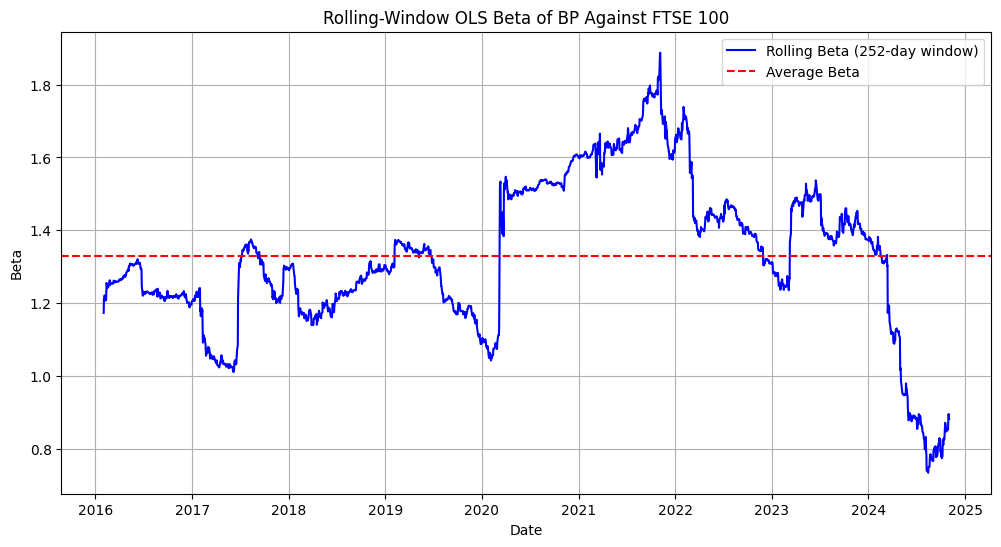

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

## defining rolling window size (e.g., 252 trading days for 1 year)
rolling_window = 252

rolling_betas = []

df = df.sort_values(by="Date")

## rolling OLS regression
for i in range(len(df) - rolling_window + 1):
    window_data = df.iloc[i : i + rolling_window]

    X = sm.add_constant(window_data["Market_Return"])  ## adding intercept
    y = window_data["BP_Return"]

    model = sm.OLS(y, X).fit()
    rolling_betas.append(model.params["Market_Return"])

## creating a date index for the rolling betas
rolling_dates = df["Date"][rolling_window - 1:]

## plotting rolling betas
plt.figure(figsize=(12, 6))
plt.plot(rolling_dates, rolling_betas, label="Rolling Beta (252-day window)", color="blue")
plt.axhline(y=np.mean(rolling_betas), linestyle="--", color="red", label="Average Beta")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.title("Rolling-Window OLS Beta of BP Against FTSE 100")
plt.legend()
plt.grid()

plt.show()


In [ ]:
## ensuring rolling_dates and rolling_betas have the same length
assert len(rolling_dates) == len(rolling_betas), "Mismatch between rolling_dates and rolling_betas"

## creating a DataFrame for rolling betas, shifting the date forward by 252 days
rolling_beta_df = pd.DataFrame({
    "Date": rolling_dates.values,  ## converting index to values if necessary
    "Rolling_Beta_252": rolling_betas
})

## shifting Date index forward by 252 days to match future values
rolling_beta_df["Date"] = rolling_beta_df["Date"].shift(-252)  # Align with the correct target

## dropping the last 252 rows since they will be NaN after shifting
rolling_beta_df.dropna(inplace=True)

## merging the shifted rolling betas with df
df = df.merge(rolling_beta_df, on="Date", how="left")

In [ ]:
df

,Date,BP_Price,BP_Volume,Oil_Futures_Close,Oil_Futures_Volume,FTSE100_Close,GDP_Value,Gilt_Yield,Inflation_Index,Interest_Rate,BP_Return,Market_Return,Rolling_Beta_252
0,2015-02-03,449.85,72460000.0,57.91,414590.0,6871.80,93.387541,1.4630,110.758039,0.5,0.027380,0.013073,NaN
1,2015-02-04,445.35,41630000.0,54.16,359740.0,6860.02,93.387541,1.5330,110.758039,0.5,-0.010054,-0.001716,NaN
2,2015-02-05,450.10,34600000.0,56.57,338820.0,6865.93,93.387541,1.5490,110.758039,0.5,0.010609,0.000861,NaN
3,2015-02-06,450.60,33550000.0,57.80,253310.0,6853.44,93.387541,1.6470,110.758039,0.5,0.001110,-0.001821,NaN
4,2015-02-09,457.10,34910000.0,58.34,213520.0,6837.15,93.335954,1.6130,116.186114,0.5,0.014322,-0.002380,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,2024-10-28,399.10,35300000.0,71.42,317180.0,8285.62,100.252469,4.2570,143.555369,5.0,-0.014428,0.004449,1.396698
2460,2024-10-29,379.25,65070000.0,71.12,108890.0,8219.61,100.252469,4.3140,143.555369,5.0,-0.051016,-0.007999,1.397377
2461,2024-10-30,374.05,106190000.0,72.55,90920.0,8159.63,100.252469,4.3490,143.555369,5.0,-0.013806,-0.007324,1.397183
2462,2024-10-31,376.65,44850000.0,73.16,14270.0,8110.10,100.252469,4.4450,143.555369,5.0,0.006927,-0.006089,1.387675


In [ ]:
df = df.dropna(subset=["Rolling_Beta_252"]).reset_index(drop=True)

In [ ]:
df.head(10)

,Date,BP_Price,BP_Volume,Oil_Futures_Close,Oil_Futures_Volume,FTSE100_Close,GDP_Value,Gilt_Yield,Inflation_Index,Interest_Rate,BP_Return,Market_Return,Rolling_Beta_252
0,2017-01-30,476.05,30120000.0,55.23,104900.0,7118.48,94.423392,1.444,108.905217,0.25,-0.022330,-0.009230,1.173197
1,2017-01-31,472.85,40180000.0,55.70,28800.0,7099.15,94.423392,1.418,108.905217,0.25,-0.006745,-0.002719,1.212058
2,2017-02-01,472.90,28290000.0,56.80,301240.0,7107.65,94.423392,1.452,108.905217,0.25,0.000106,0.001197,1.207707
3,2017-02-02,472.70,32670000.0,56.56,297350.0,7140.75,94.423392,1.383,108.905217,0.25,-0.000423,0.004646,1.221455
4,2017-02-03,478.60,26750000.0,56.81,264760.0,7188.30,94.423392,1.358,108.905217,0.25,0.012404,0.006637,1.219092
5,2017-02-06,476.55,27040000.0,55.72,252700.0,7172.15,94.875124,1.318,108.312072,0.25,-0.004293,-0.002249,1.208508
6,2017-02-07,457.10,58000000.0,55.05,317180.0,7186.22,94.875124,1.292,108.312072,0.25,-0.041670,0.001960,1.212516
7,2017-02-08,455.95,44760000.0,55.12,409830.0,7188.82,94.875124,1.216,108.312072,0.25,-0.002519,0.000362,1.207550
8,2017-02-09,458.70,37090000.0,55.63,263400.0,7229.50,94.875124,1.247,108.312072,0.25,0.006013,0.005643,1.230042
9,2017-02-10,459.60,49950000.0,56.70,284710.0,7258.75,94.875124,1.257,108.312072,0.25,0.001960,0.004038,1.255647


In [ ]:
from sklearn.preprocessing import MinMaxScaler

## Feature Engineering
window_size = 7  ## Rolling window size
lags = [1, 5, 10]  ## Lags to include

## Rolling Mean & Standard Deviation
df["FTSE100_Close_rolling_mean7"] = df["FTSE100_Close"].rolling(window=window_size).mean()
df["Gilt_Yield_rolling_mean7"] = df["Gilt_Yield"].rolling(window=window_size).mean()
df["Interest_Rate_rolling_mean7"] = df["Interest_Rate"].rolling(window=window_size).mean()

df["FTSE100_Close_rolling_std7"] = df["FTSE100_Close"].rolling(window=window_size).std()
df["Gilt_Yield_rolling_std7"] = df["Gilt_Yield"].rolling(window=window_size).std()

## Lag Features
for lag in lags:
    df[f"FTSE100_Close_lag{lag}"] = df["FTSE100_Close"].shift(lag)
    df[f"Gilt_Yield_lag{lag}"] = df["Gilt_Yield"].shift(lag)
    df[f"Interest_Rate_lag{lag}"] = df["Interest_Rate"].shift(lag)
    df[f"BP_Return_lag{lag}"] = df["BP_Return"].shift(lag)
    df[f"Market_Return_lag{lag}"] = df["Market_Return"].shift(lag)

## ensuring Rolling_Beta_252 is not removed
df.dropna(inplace=True)

## Min-Max Scaling (Exclude Rolling_Beta_252)
scaler = MinMaxScaler()
scaled_columns = [
    "FTSE100_Close", "Gilt_Yield", "Interest_Rate",
    "FTSE100_Close_rolling_mean7", "Gilt_Yield_rolling_mean7", "Interest_Rate_rolling_mean7",
    "FTSE100_Close_rolling_std7", "Gilt_Yield_rolling_std7"
] + [f"{col}_lag{lag}" for col in ["FTSE100_Close", "Gilt_Yield", "Interest_Rate", "BP_Return", "Market_Return"] for lag in lags]

df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

## Ensure Rolling_Beta_252 remains in the dataset
df.reset_index(drop=True, inplace=True)

df.head()


,Date,BP_Price,BP_Volume,Oil_Futures_Close,Oil_Futures_Volume,FTSE100_Close,GDP_Value,Gilt_Yield,Inflation_Index,Interest_Rate,...,FTSE100_Close_lag5,Gilt_Yield_lag5,Interest_Rate_lag5,BP_Return_lag5,Market_Return_lag5,FTSE100_Close_lag10,Gilt_Yield_lag10,Interest_Rate_lag10,BP_Return_lag10,Market_Return_lag10
0,2017-02-13,459.60,23650000.0,55.59,234310.0,0.661961,95.255944,0.261028,107.135336,0.029126,...,0.631030,0.266167,0.029126,0.515394,0.559362,0.615482,0.293148,0.029126,0.471629,0.524767
1,2017-02-14,459.50,18250000.0,55.97,254980.0,0.658960,95.255944,0.264454,107.135336,0.029126,...,0.635106,0.260600,0.029126,0.424704,0.580221,0.609883,0.287580,0.029126,0.509444,0.557034
2,2017-02-15,457.55,26740000.0,55.75,272520.0,0.668766,95.255944,0.262527,107.135336,0.029126,...,0.635860,0.244325,0.029126,0.519697,0.572301,0.612345,0.294861,0.029126,0.526066,0.576439
3,2017-02-16,448.40,29540000.0,55.65,310840.0,0.661671,95.255944,0.254604,107.135336,0.029126,...,0.647644,0.250964,0.029126,0.540399,0.598472,0.621934,0.280086,0.029126,0.524783,0.593533
4,2017-02-17,446.00,34020000.0,55.81,270490.0,0.668056,95.255944,0.243683,107.135336,0.029126,...,0.656118,0.253105,0.029126,0.530565,0.590518,0.635709,0.274732,0.029126,0.555906,0.603398


In [ ]:
## preparing Train-Test Split
train_df = df[df["Date"] < "2024-01-01"].copy()  ## training on 2017-2023
test_df = df[df["Date"] >= "2024-01-01"].copy()  ## testing on 2024

features = [
    "FTSE100_Close", "Gilt_Yield", "Interest_Rate",
    "FTSE100_Close_rolling_mean7", "Gilt_Yield_rolling_mean7", "Interest_Rate_rolling_mean7",
    "FTSE100_Close_rolling_std7", "Gilt_Yield_rolling_std7"
] + [f"{col}_lag{lag}" for col in ["FTSE100_Close", "Gilt_Yield", "Interest_Rate", "BP_Return", "Market_Return"] for lag in [1, 5, 10]]

X_train, y_train = train_df[features].values, train_df["Rolling_Beta_252"].values
X_test, y_test = test_df[features].values, test_df["Rolling_Beta_252"].values

## reshaping for LSTM/GRU
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
## installing keras-tuner
!pip install keras-tuner --upgrade

In [ ]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
## defining LSTM model
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Choice('units', [32, 64, 128]),
        return_sequences=True,
        input_shape=(X_train.shape[1], 1)
    ))
    model.add(Dropout(hp.Choice('dropout_rate', [0.1, 0.2, 0.3])))
    model.add(LSTM(
        units=hp.Choice('units2', [16, 32, 64]),
        return_sequences=False
    ))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='mean_squared_error'
    )
    return model

## defining GRU model
def build_gru_model(hp):
    model = Sequential()
    model.add(GRU(
        units=hp.Choice('units', [32, 64, 128]),
        return_sequences=True,
        input_shape=(X_train.shape[1], 1)
    ))
    model.add(Dropout(hp.Choice('dropout_rate', [0.1, 0.2, 0.3])))
    model.add(GRU(
        units=hp.Choice('units2', [16, 32, 64]),
        return_sequences=False
    ))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='mean_squared_error'
    )
    return model


In [ ]:
## LSTM Random Search Setup
lstm_tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='lstm_beta'
)

Reloading Tuner from lstm_tuning/lstm_beta/tuner0.json


In [ ]:
## adding early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

print("Starting LSTM hyperparameter tuning...")
lstm_tuner.search(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

## displaying best hyperparameters for LSTM
best_lstm_hp = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best LSTM Hyperparameters found:")
print("Units:", best_lstm_hp.get('units'))
print("Units 2:", best_lstm_hp.get('units2'))
print("Dropout Rate:", best_lstm_hp.get('dropout_rate'))
print("Learning Rate:", best_lstm_hp.get('learning_rate'))

Starting LSTM hyperparameter tuning...
Best LSTM Hyperparameters found:
Units: 64
Units 2: 32
Dropout Rate: 0.2
Learning Rate: 0.001


In [ ]:
## GRU Random Search Setup
gru_tuner = RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='gru_tuning',
    project_name='gru_beta'
)

print("Starting GRU hyperparameter tuning...")
gru_tuner.search(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

## displaying best hyperparameters for GRU
best_gru_hp = gru_tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best GRU Hyperparameters found:")
print("Units:", best_gru_hp.get('units'))
print("Units 2:", best_gru_hp.get('units2'))
print("Dropout Rate:", best_gru_hp.get('dropout_rate'))
print("Learning Rate:", best_gru_hp.get('learning_rate'))

Reloading Tuner from gru_tuning/gru_beta/tuner0.json
Starting GRU hyperparameter tuning...
Best GRU Hyperparameters found:
Units: 128
Units 2: 32
Dropout Rate: 0.3
Learning Rate: 0.001


In [ ]:
## building tuned LSTM model
final_lstm_model = build_lstm_model(best_lstm_hp)

## building tuned GRU model
final_gru_model = build_gru_model(best_gru_hp)

## training final LSTM
print("Training final tuned LSTM model...")
final_lstm_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

## training final GRU
print("Training final tuned GRU model...")
final_gru_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

## predicting beta for 2024
lstm_pred = final_lstm_model.predict(X_test).flatten()
gru_pred = final_gru_model.predict(X_test).flatten()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training final tuned LSTM model...
Training final tuned GRU model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


LSTM - MAE: 0.0689, RMSE: 0.0841, R²: 0.0212
GRU  - MAE: 0.2521, RMSE: 0.2649, R²: -8.7064


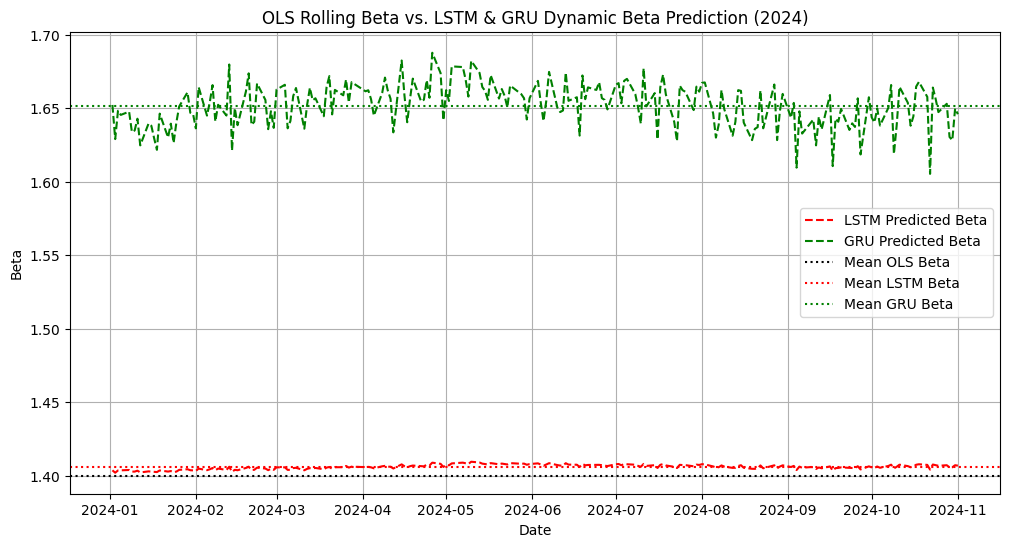

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Evaluating performance
lstm_mae = mean_absolute_error(y_test, lstm_pred)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
lstm_r2 = r2_score(y_test, lstm_pred)

gru_mae = mean_absolute_error(y_test, gru_pred)
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_pred))
gru_r2 = r2_score(y_test, gru_pred)

print(f"LSTM - MAE: {lstm_mae:.4f}, RMSE: {lstm_rmse:.4f}, R²: {lstm_r2:.4f}")
print(f"GRU  - MAE: {gru_mae:.4f}, RMSE: {gru_rmse:.4f}, R²: {gru_r2:.4f}")

## storing predictions
df_results = test_df[["Date", "Rolling_Beta_252"]].copy()
df_results["LSTM_Beta"] = lstm_pred
df_results["GRU_Beta"] = gru_pred

##plotting OLS vs LSTM vs GRU Predictions
plt.figure(figsize=(12, 6))
plt.plot(df_results["Date"], df_results["LSTM_Beta"], label="LSTM Predicted Beta", linestyle="dashed", color="red")
plt.plot(df_results["Date"], df_results["GRU_Beta"], label="GRU Predicted Beta", linestyle="dashed", color="green")
plt.axhline(y=df_results["Rolling_Beta_252"].mean(), linestyle="dotted", color="black", label="Mean OLS Beta")
plt.axhline(y=df_results["LSTM_Beta"].mean(), linestyle="dotted", color="red", label="Mean LSTM Beta")
plt.axhline(y=df_results["GRU_Beta"].mean(), linestyle="dotted", color="green", label="Mean GRU Beta")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Beta")
plt.title("OLS Rolling Beta vs. LSTM & GRU Dynamic Beta Prediction (2024)")
plt.grid()
plt.show()